<a href="https://colab.research.google.com/github/khilmilutfan/2318059_Datasheet-EDA/blob/main/2318059_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🛍️ Exploratory Data Analysis (EDA) — Dataset Penjualan dan Perilaku Konsumen E-Commerce (Olist)

Notebook ini berisi tahapan lengkap Exploratory Data Analysis (EDA) untuk dataset Olist E-Commerce, yang mencakup data transaksi dan produk.
Analisis dilakukan melalui beberapa tahap utama sebagai berikut:

1️⃣ Pembersihan Data (Data Cleansing)
Membersihkan data dari nilai kosong, duplikasi, dan inkonsistensi agar siap digunakan dalam proses analisis.

2️⃣ Penggabungan dan Pengayaan Data (Data Enrichment)
Menggabungkan beberapa dataset seperti transaksi dan produk berdasarkan product_id untuk memperkaya informasi dan memperoleh konteks yang lebih luas.

3️⃣ Visualisasi Data (Data Visualization)
Menyajikan data dalam bentuk grafik seperti bar chart, line chart, dan boxplot untuk memahami pola dan tren secara visual.

4️⃣ Penarikan Insight atau Temuan Akhir (Insight Extraction)
Menginterpretasikan hasil analisis guna menemukan pola perilaku konsumen, tren penjualan, serta faktor-faktor yang memengaruhi performa bisnis e-commerce.

📌 Tujuan Analisis:
Menemukan pola, tren, dan hubungan antara variabel seperti 💰 harga produk, 🏷️ kategori produk, 🚚 biaya pengiriman, dan 💵 total penjualan.
Analisis ini bertujuan untuk memahami perilaku konsumen serta mengidentifikasi kategori produk terlaris, pola pembelian pelanggan, dan faktor yang memengaruhi kinerja penjualan secara keseluruhan.

# **1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Langkah 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Load Data transaksi dan product**
Data didapatkan dari sumber:https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data mining/transaksi.csv')

In [ ]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data mining/product.csv')

In [ ]:
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# **3. Hapus duplikat**

In [ ]:
print("dupl items:", df.duplicated().sum())
print("dupl products:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)

dupl items: 0
dupl products: 0


# **4. Cek missing value**

In [ ]:
print(df.isnull().sum().sort_values(ascending=False).head(10))
print(df.isnull().sum().sort_values(ascending=False).head(10))

product_category_name         610
product_description_lenght    610
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
product_id                      0
dtype: int64
product_category_name         610
product_description_lenght    610
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
product_id                      0
dtype: int64


# **5.Pastikan tipe data benar**
Tujuan: kolom numerik & tanggal mesti numeric/datetime.

In [ ]:
numeric_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


# **6. Hapus nilai tidak logis**

In [ ]:
transaksi_df = transaksi_df[transaksi_df['price'] > 0]

print("Transaksi data after removing illogical values:")
display(transaksi_df.head())


Transaksi data after removing illogical values:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# **7. Feature engineering (tambahan kolom berguna)**

In [ ]:
transaksi_df['total_cost'] = transaksi_df['price']  # kalau memang price adalah total untuk item
# Jika ada qty: transaksi_df['total_cost'] = transaksi_df['price'] * transaksi_df['quantity']

# **8. Standardisasi teks kategori di products**

In [ ]:
df['product_category_name'] = df['product_category_name'].astype(str).str.lower().str.strip()

# **9.Merge kedua dataset (kunci: product_id)**
gabungkan info transaksi + atribut produk.

In [ ]:
merged_df = pd.merge(transaksi_df, df, on='product_id', how='inner')
print("merged shape:", merged_df.shape)
display(merged_df.head())

merged shape: (112650, 16)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_cost,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


# **10.Data Exploration & Data Visualisation**
Statistik Deskriptif

<Figure size 1000x600 with 0 Axes>

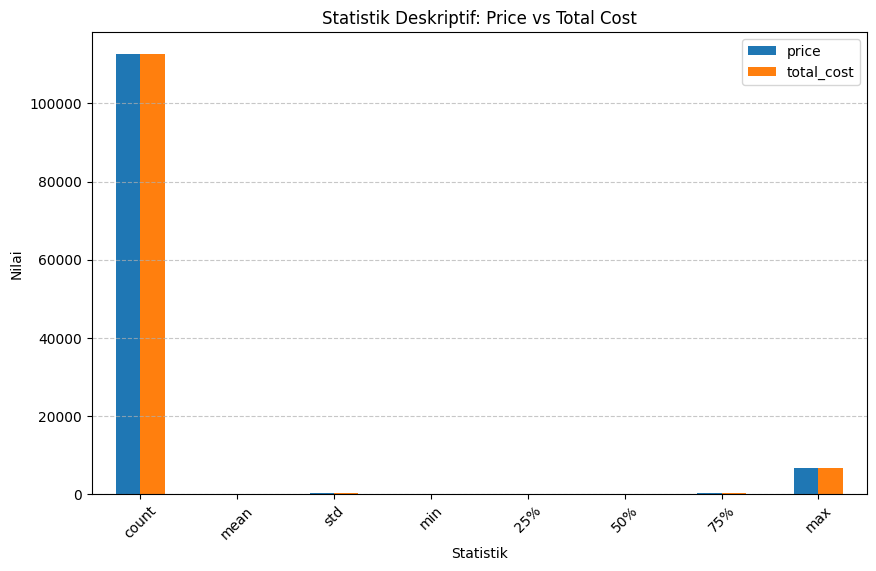

In [ ]:
# Hitung statistik
stats = merged_df[['price', 'total_cost']].describe()

# Tampilkan sebagai grafik batang
plt.figure(figsize=(10, 6))
stats.plot(kind='bar', figsize=(10, 6))
plt.title('Statistik Deskriptif: Price vs Total Cost')
plt.xlabel('Statistik')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nilai unik & distribusi kategori

Lihat kategori paling sering muncul.

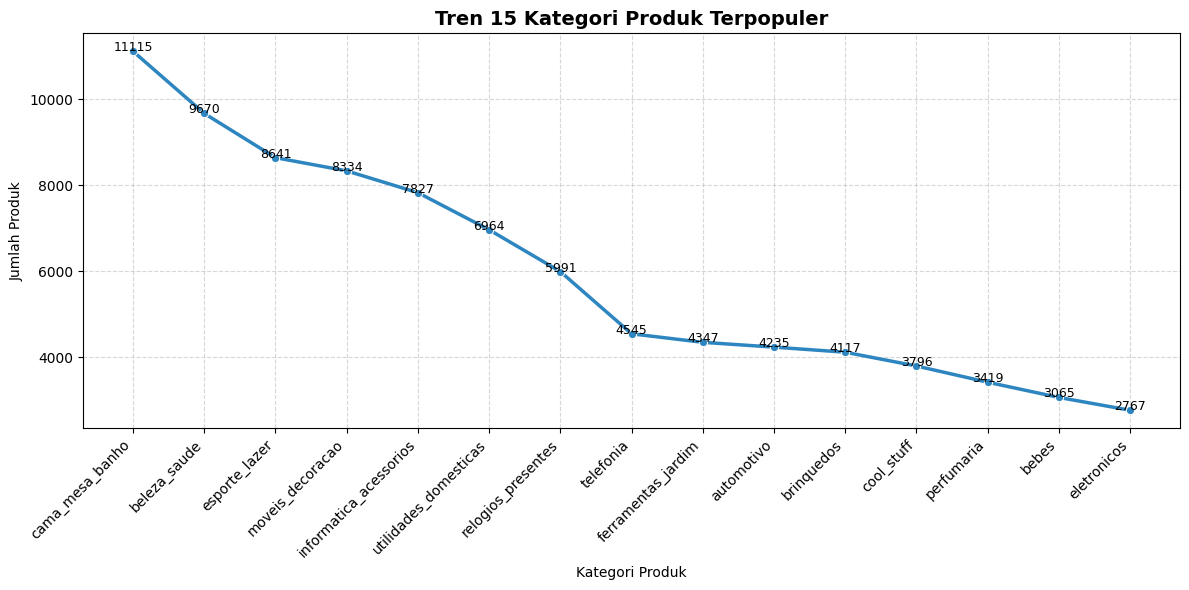

In [ ]:
# Ambil 15 kategori teratas
top15_categories = merged_df['product_category_name'].value_counts().head(15)

# Buat figure
plt.figure(figsize=(12,6))

# Line chart
sns.lineplot(
    x=top15_categories.index,
    y=top15_categories.values,
    marker='o',
    linewidth=2.5,
    color='#2E86C1'
)

# Judul dan label
plt.title("Tren 15 Kategori Produk Terpopuler", fontsize=14, fontweight='bold')
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Produk")

# Putar label X biar rapi
plt.xticks(rotation=45, ha='right')

# Tambahkan nilai di tiap titik
for i, val in enumerate(top15_categories.values):
    plt.text(i, val + 0.3, str(val), ha='center', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Korelasi numerik (untuk heatmap)

In [ ]:
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()
corr = merged_df[numeric_cols].corr()
corr

,order_item_id,price,freight_value,total_cost,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
order_item_id,1.000000,-0.060522,-0.029380,-0.060522,-0.022662,-0.014311,-0.055852,-0.003549,0.005628,0.029323,-0.010732
price,-0.060522,1.000000,0.414204,1.000000,0.017001,0.198166,0.051848,0.338819,0.145811,0.223602,0.172467
freight_value,-0.029380,0.414204,1.000000,0.414204,0.023611,0.093855,0.022259,0.610420,0.309086,0.391831,0.323777
total_cost,-0.060522,1.000000,0.414204,1.000000,0.017001,0.198166,0.051848,0.338819,0.145811,0.223602,0.172467
product_name_lenght,-0.022662,0.017001,0.023611,0.017001,1.000000,0.091524,0.145904,0.022731,0.060447,-0.028170,0.064442
product_description_lenght,-0.014311,0.198166,0.093855,0.198166,0.091524,1.000000,0.118087,0.059710,0.005971,0.072724,-0.068419
product_photos_qty,-0.055852,0.051848,0.022259,0.051848,0.145904,0.118087,1.000000,0.022667,0.047503,-0.033399,0.010367
product_weight_g,-0.003549,0.338819,0.610420,0.338819,0.022731,0.059710,0.022667,1.000000,0.460919,0.583277,0.506609
product_length_cm,0.005628,0.145811,0.309086,0.145811,0.060447,0.005971,0.047503,0.460919,1.000000,0.192895,0.532537
product_height_cm,0.029323,0.223602,0.391831,0.223602,-0.028170,0.072724,-0.033399,0.583277,0.192895,1.000000,0.281224


# **11. Heatmap Korelasi Antar Fitur Numerik pada Dataset Penjualan Olist**

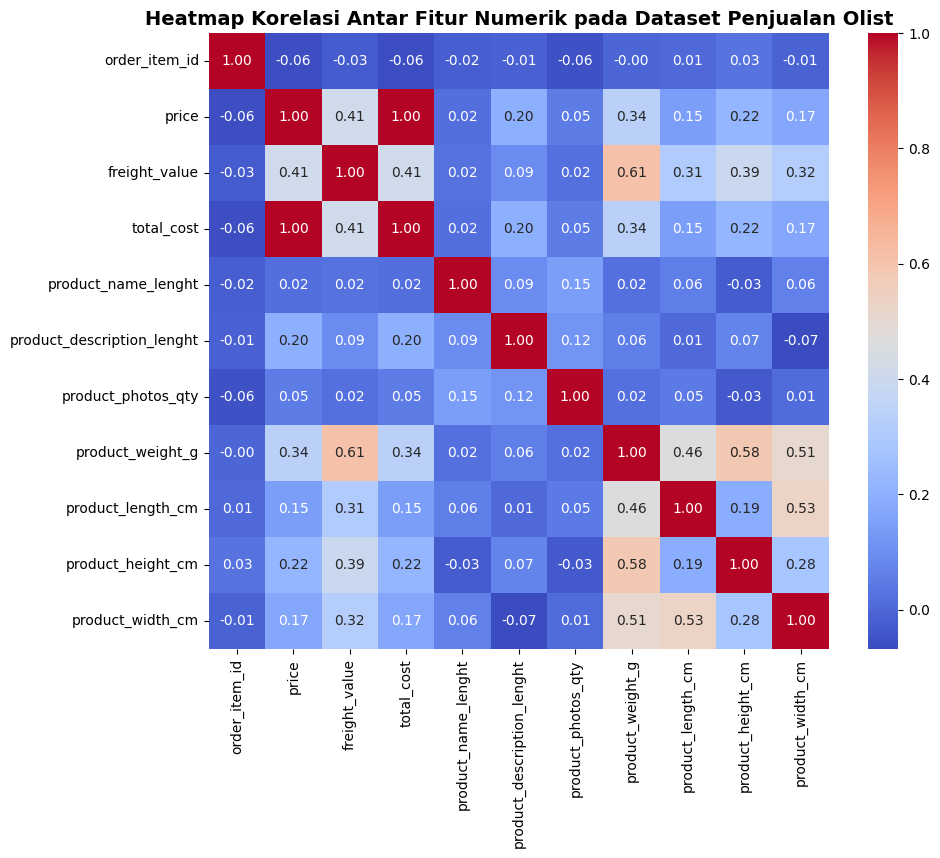

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik pada Dataset Penjualan Olist', fontsize=14, fontweight='bold')
plt.show()


# **13. Distribusi (Histogram / KDE)**

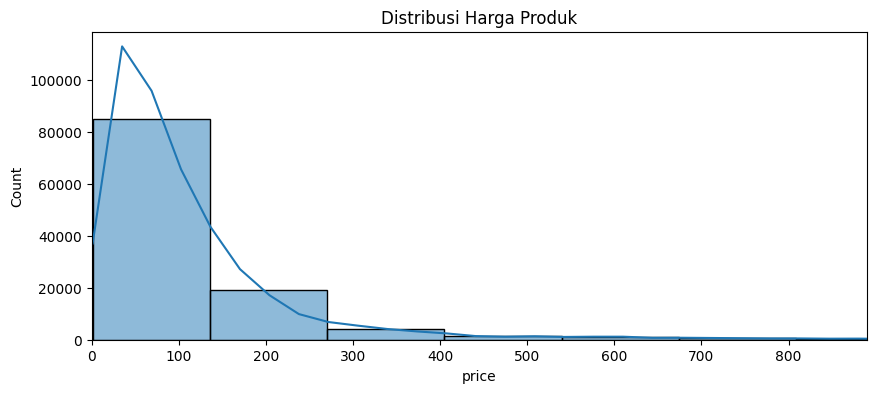

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(merged_df['price'], bins=50, kde=True)
plt.xlim(0, merged_df['price'].quantile(0.99))
plt.title('Distribusi Harga Produk')
plt.show()

# **14. Boxplot (cari outlier per kategori)**

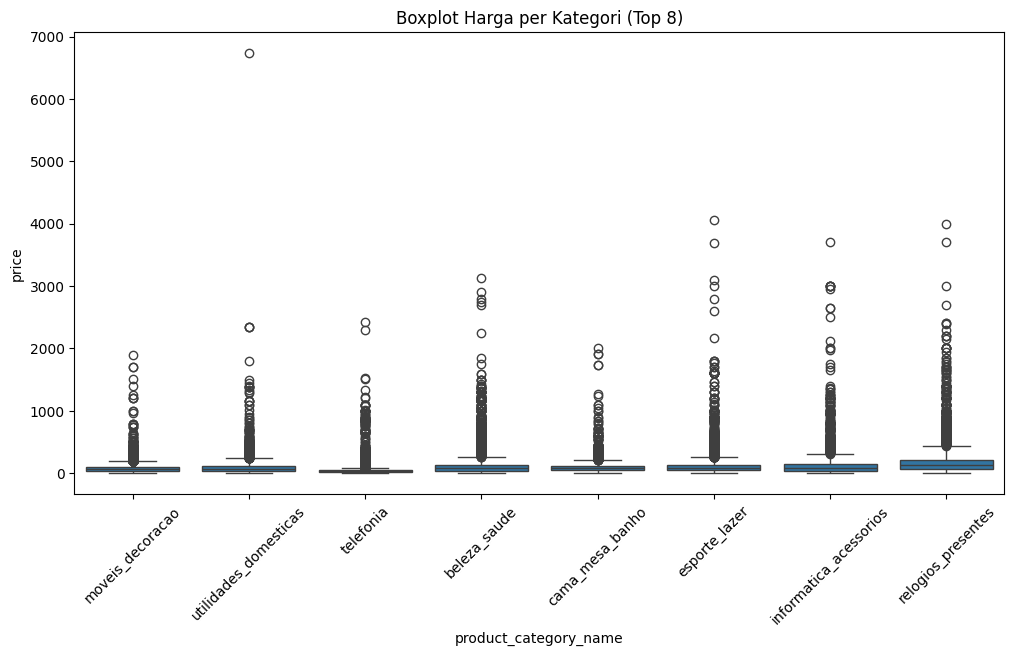

In [ ]:
top_cats = merged_df['product_category_name'].value_counts().nlargest(8).index
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df[merged_df['product_category_name'].isin(top_cats)], x='product_category_name', y='price')
plt.xticks(rotation=45)
plt.title('Boxplot Harga per Kategori (Top 8)')
plt.show()

# **15. Scatterplot (hubungan dua variabel)**

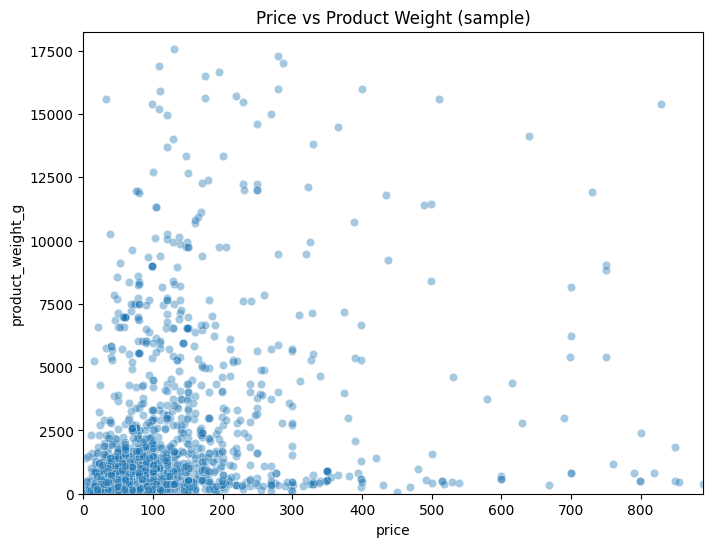

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df.sample(2000, random_state=1), x='price', y='product_weight_g', alpha=0.4)
plt.xlim(0, merged_df['price'].quantile(0.99))
plt.ylim(0, merged_df['product_weight_g'].quantile(0.99))
plt.title('Price vs Product Weight (sample)')
plt.show()

# **16. Bar chart top kategori by revenue / count**

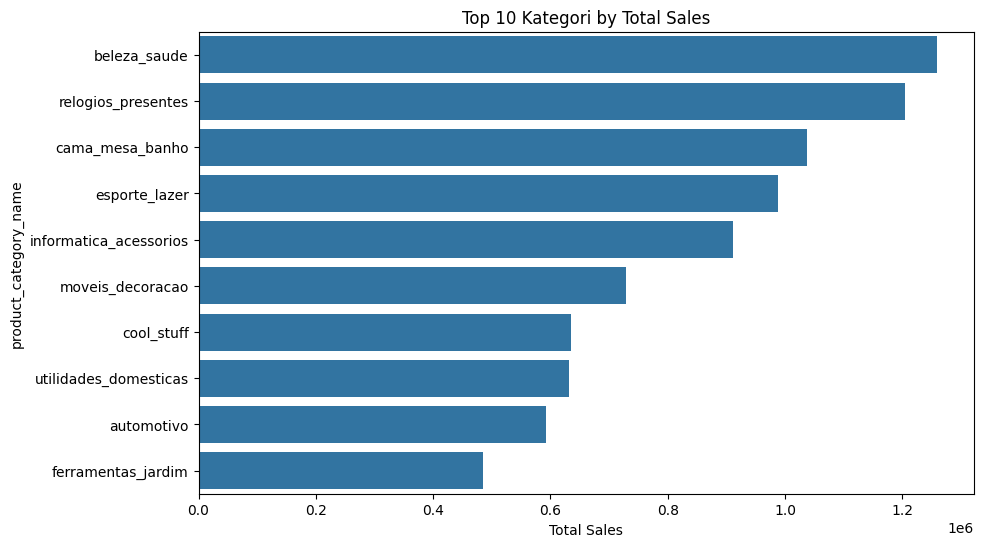

In [ ]:
rev_by_cat = merged_df.groupby('product_category_name')['total_cost'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=rev_by_cat.values, y=rev_by_cat.index)
plt.title('Top 10 Kategori by Total Sales')
plt.xlabel('Total Sales')
plt.show()